# Deep Learning: Ex.3 - CNN

Submitted by: Noam Bassat 308465434


In [1]:
# TensorFlow and tf.keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


---
### Load the MNIST dataset

The original dataset contains 60,000 28x28 images.

We will use here a smaller version of 5,000 20x20 images.

Check the following example: https://keras.io/examples/vision/mnist_convnet/

In [2]:
mnist = np.load('mnist.npz')

X = mnist['imgs']
y = mnist['labels']

X = np.expand_dims(X, -1)  # (5000,20,20) -> (5000,20,20,1)

print('X.shape = ',X.shape)
print('y.shape = ',y.shape)

X.shape =  (5000, 20, 20, 1)
y.shape =  (5000,)


***

Exercise summary:

- We will try different models (build, fit on training data, and evaluate on test data).

- The input layer is the images (`20x20x1`), and the output layer is a `softmax` of 10 units (one unit for each class).

- For each model, plot the training loss & accuracy plots (as shown in class).

- Summarize the results of all models in the table below at the end of this notebook.



***
### 1. No hidden layers

Just connect all inputs directly to the output layer (always remember to add a `Flatten` layer before using a `Dense` layer).

*input -> 10-output*


In [3]:
def compile_(model, epochs_n,batch_size_n):
    model.compile(optimizer='sgd', # stochastic gradient descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    history = model.fit(X, y, epochs=epochs_n, batch_size=128)

    return history

def Loss_(model, history):
    plt.plot(history.history['loss'],'o-')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.grid()
    
def Accuracy_(model, history):
    plt.plot(history.history['accuracy'],'o-r')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid()

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(20, 20,1)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                4010      
Total params: 4,010
Trainable params: 4,010
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = compile_(model,50,100)

Epoch 1/50
40/40 [==============================] - 0s 1ms/step - loss: 2.4207 - accuracy: 0.1002
Epoch 2/50
40/40 [==============================] - 0s 769us/step - loss: 2.1899 - accuracy: 0.2158
Epoch 3/50
40/40 [==============================] - 0s 744us/step - loss: 2.0011 - accuracy: 0.4166
Epoch 4/50
40/40 [==============================] - 0s 846us/step - loss: 1.8496 - accuracy: 0.5420
Epoch 5/50
40/40 [==============================] - 0s 1000us/step - loss: 1.7231 - accuracy: 0.6172
Epoch 6/50
40/40 [==============================] - 0s 923us/step - loss: 1.6157 - accuracy: 0.6488
Epoch 7/50
40/40 [==============================] - 0s 820us/step - loss: 1.5085 - accuracy: 0.6946
Epoch 8/50
40/40 [==============================] - 0s 821us/step - loss: 1.4236 - accuracy: 0.7248
Epoch 9/50
40/40 [==============================] - 0s 872us/step - loss: 1.3477 - accuracy: 0.7384
Epoch 10/50
40/40 [==============================] - 0s 897us/step - loss: 1.2709 - accuracy: 0.7639


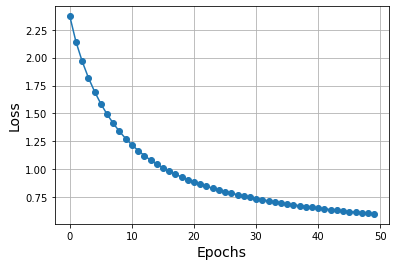

In [6]:
Loss_(model,history)

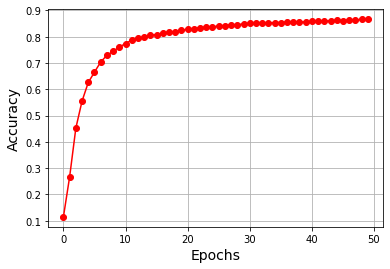

In [7]:
Accuracy_(model,history)

***
### 2. Dense hidden layer

Add a 32-`Dense` layer (32 units) between the input and output.

*input -> 32-dense -> 10-output*



In [8]:
model = Sequential()
model.add(Flatten(input_shape=(20, 20,1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,162
Trainable params: 13,162
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = compile_(model,50,100)

Epoch 1/50
40/40 [==============================] - 0s 990us/step - loss: 2.3057 - accuracy: 0.1664
Epoch 2/50
40/40 [==============================] - 0s 794us/step - loss: 2.1179 - accuracy: 0.3071
Epoch 3/50
40/40 [==============================] - 0s 866us/step - loss: 1.9598 - accuracy: 0.4382
Epoch 4/50
40/40 [==============================] - 0s 897us/step - loss: 1.8083 - accuracy: 0.5399
Epoch 5/50
40/40 [==============================] - 0s 898us/step - loss: 1.6820 - accuracy: 0.5905
Epoch 6/50
40/40 [==============================] - 0s 897us/step - loss: 1.5385 - accuracy: 0.6579
Epoch 7/50
40/40 [==============================] - 0s 949us/step - loss: 1.4114 - accuracy: 0.6956
Epoch 8/50
40/40 [==============================] - 0s 897us/step - loss: 1.3041 - accuracy: 0.7321
Epoch 9/50
40/40 [==============================] - 0s 872us/step - loss: 1.2064 - accuracy: 0.7461
Epoch 10/50
40/40 [==============================] - 0s 897us/step - loss: 1.1183 - accuracy: 0.7635

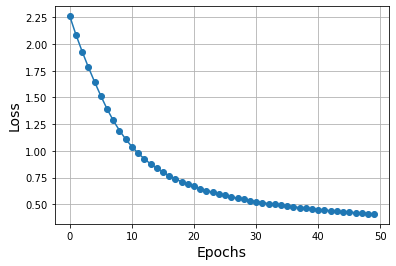

In [10]:
Loss_(model, history)

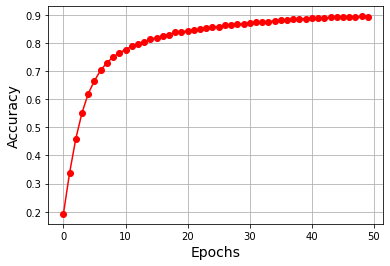

In [11]:
Accuracy_(model,history)

***
### 3. Simple ConvNet

Use 64 3x3 filters (`Conv2D`) between the input layer and the output layer.

*input -> 64-conv -> 10-output*



In [4]:
model = Sequential()
model.add(Conv2D(64,kernel_size = (3,3), activation='relu', input_shape=(20, 20,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 64)        640       
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                207370    
Total params: 208,010
Trainable params: 208,010
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = compile_(model, 20,100)

Epoch 1/20
40/40 [==============================] - 1s 15ms/step - loss: 2.2571 - accuracy: 0.2880
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 2.0140 - accuracy: 0.6260
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 1.6003 - accuracy: 0.7889
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 1.1357 - accuracy: 0.8224
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.8437 - accuracy: 0.8318
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.6845 - accuracy: 0.8500
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5734 - accuracy: 0.8751
Epoch 8/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5393 - accuracy: 0.8631
Epoch 9/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4929 - accuracy: 0.8710
Epoch 10/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4520 - accuracy: 0.8837
Epoch 11/

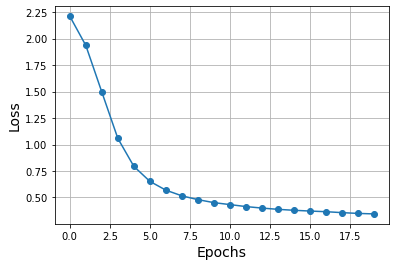

In [6]:
Loss_(model,history)

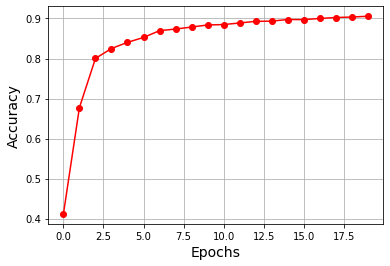

In [7]:
Accuracy_(model, history)

***
### 4. Bigger ConvNet

Apply the following layers (between the input and output layers):
- 32 3x3-`Conv2D` + 2x2 `MaxPooling`
- 64 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128-`Dense`

Use `padding='same'` in the Conv2D layers.

In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation='relu',padding='same', input_shape=(20, 20,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [9]:
history = compile_(model,30,80)

Epoch 1/30
40/40 [==============================] - 2s 39ms/step - loss: 4.7480 - accuracy: 0.0380
Epoch 2/30
40/40 [==============================] - 2s 39ms/step - loss: 3.6816 - accuracy: 0.1022
Epoch 3/30
40/40 [==============================] - 1s 36ms/step - loss: 2.2405 - accuracy: 0.2619
Epoch 4/30
40/40 [==============================] - 1s 36ms/step - loss: 2.0374 - accuracy: 0.4111
Epoch 5/30
40/40 [==============================] - 1s 37ms/step - loss: 1.8780 - accuracy: 0.4662
Epoch 6/30
40/40 [==============================] - 1s 36ms/step - loss: 1.6896 - accuracy: 0.5000
Epoch 7/30
40/40 [==============================] - 1s 37ms/step - loss: 1.4998 - accuracy: 0.5694
Epoch 8/30
40/40 [==============================] - 1s 37ms/step - loss: 1.5024 - accuracy: 0.6097
Epoch 9/30
40/40 [==============================] - 1s 37ms/step - loss: 1.1235 - accuracy: 0.6767
Epoch 10/30
40/40 [==============================] - 2s 39ms/step - loss: 0.9762 - accuracy: 0.7062
Epoch 11/

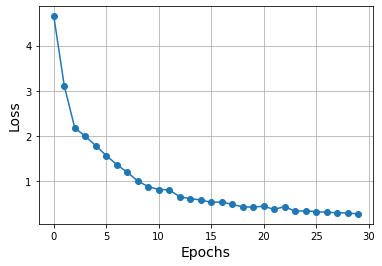

In [10]:
Loss_(model,history)


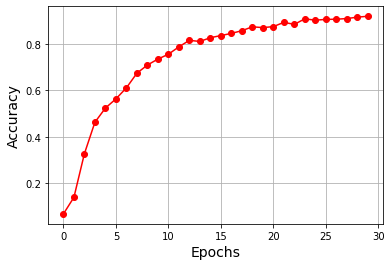

In [11]:
Accuracy_(model,history)

---

### Summarize 

Summarize your findings in the table below (edit this markdown cell).

<table>
  <tr>
    <th>Model</th>
    <th>#parameters</th>
    <th>batch-size</th>
    <th>epochs</th>
    <th>accuracy</th>
  </tr>
    
  <!-- copy this block once for every model you tested -->  
  <tr> 
    <td>1</td>   <!-- Model -->
    <td>  4010 </td> <!-- #parameters -->
    <td>100</td> <!-- batch-size -->
    <td>50</td> <!-- epochs -->
    <td>0.8644</td> <!-- accuracy -->
  </tr>
    
   <tr> 
    <td>2</td>   <!-- Model -->
    <td>  13162 </td> <!-- #parameters -->
    <td>100</td> <!-- batch-size -->
    <td>50</td> <!-- epochs -->
    <td>0.8999</td> <!-- accuracy -->
  </tr>
    
   <tr> 
    <td>3</td>   <!-- Model -->
    <td>  208010 </td> <!-- #parameters -->
    <td>80</td> <!-- batch-size -->
    <td>20</td> <!-- epochs -->
    <td>0.9074</td> <!-- accuracy -->
  </tr>
    
   <tr> 
    <td>4</td>   <!-- Model -->
    <td> 158336 </td> <!-- #parameters -->
    <td>80</td> <!-- batch-size -->
    <td>30</td> <!-- epochs -->
    <td>0.9195</td> <!-- accuracy -->
  </tr>
    
 
</table>




***
## Good Luck!